In [ ]:
# google drive를 google colab에 연결. 처음 실행 시, 인증 필요
from google.colab import drive
drive.mount('/content/gdrive')    

In [ ]:
#모듈(변수나 함수를 포함)만 불러오기
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  

# iris 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"
df = pd.read_csv(dir + "iris.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.8,2.2,Iris-virginica
2,4.6,3.1,1.5,0.2,Iris-setosa
3,6.4,2.8,5.6,2.1,Iris-virginica
4,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,5.1,3.8,1.9,0.4,Iris-setosa
146,5.7,2.8,4.5,1.3,Iris-versicolor
147,6.9,3.1,5.4,2.1,Iris-virginica
148,7.2,3.0,5.8,1.6,Iris-virginica


In [ ]:
X = df.iloc[:,0:4]

# 레이블 (labeling) onehot-encoding기법
bclass = {"Iris-setosa":[1,0,0], "Iris-versicolor":[0,1,0], "Iris-virginica":[0,0,1]}
y = np.empty((150,3))     
for i, v in enumerate(df["iris_type"]):
  y[i] = bclass[v]        
#"iris-setosa'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[101:150], y[101:150]

In [ ]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  
model.add(layers.Dense(16, input_shape=(4,))) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.05))      

model.add(layers.Dense(8))       
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy', 
    optimizer="rmsprop",  
    metrics=['accuracy']) 

In [ ]:
# 데이터 훈련하기
hist = model.fit( X_train, y_train, batch_size=5, epochs=300, validation_split=0.2,  
      #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
      verbose=1) 

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/300
16/16 [==============================] - 1s 15ms/step - loss: 1.1801 - accuracy: 0.4250 - val_loss: 0.9634 - val_accuracy: 0.6000
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 0.9923 - accuracy: 0.5250 - val_loss: 0.9145 - val_accuracy: 0.7500
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 0.9661 - accuracy: 0.7000 - val_loss: 0.8831 - val_accuracy: 0.8500
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.7625 - val_loss: 0.8525 - val_accuracy: 0.9000
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 0.8665 - accuracy: 0.8375 - val_loss: 0.8307 - val_accuracy: 1.0000
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 0.8723 - accuracy: 0.8125 - val_loss: 0.8065 - val_accuracy: 1.0000
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.7375 - val_loss: 0.7651 - val_accuracy: 1.0000
Epoch 8/300


In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

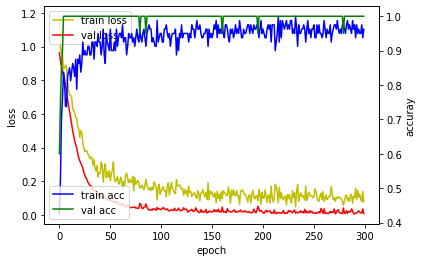

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 2

In [ ]:
model.get_weights()

[array([[-0.07024505, -0.31196666, -0.30865902, -0.0595131 , -0.3471586 ,
          0.15852566,  0.26915276, -0.47061747, -0.2844568 ,  0.29970753,
          0.13255024, -0.03408131,  0.40736634, -0.31909275, -0.35506448,
         -0.26891464],
        [-0.39631405,  0.09553421,  0.32443577, -0.23512645,  0.22775106,
         -0.26499057,  0.18898487, -0.5414001 ,  0.02344451, -0.37339777,
         -0.5259195 ,  0.7030973 ,  0.10171921, -0.16057447, -0.43802786,
         -0.05623099],
        [ 0.26917467,  0.04101181, -0.01170939,  0.43688646,  0.3518328 ,
          0.02560802,  0.07062239,  0.37145603,  0.35025215, -0.502278  ,
         -0.25200948, -0.29255268, -0.60029304,  0.35923898,  0.5522235 ,
         -0.0238207 ],
        [-0.08779056, -0.3553621 ,  0.35475928,  0.34667584,  0.44132072,
          0.787394  ,  0.37047073, -0.36275515,  0.16991618, -0.14995149,
         -0.06998301, -0.28826496, -0.02919878,  0.65743965,  0.6769518 ,
         -0.42416745]], dtype=float32),
 ar

In [ ]:
model.save(dir+"dnn_iris.h5")
print("Saved model to disk.")

#load and evaluate the saved model
from numpy import loadtxt
from tensorflow.python.keras.models import load_model

#load model
loaded_model = load_model(dir+"dnn_iris.h5")
model.summary()

score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None,

In [ ]:
# X_test의 예측 클래스 확인하기
y_prob = model.predict(X_test)  # output node의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # output node의 예측값(class) 확인하기
y_class

[[8.2167060e-12 1.3503967e-03 9.9864966e-01]
 [1.6019867e-09 8.4399786e-03 9.9156004e-01]
 [2.5842572e-03 9.9623352e-01 1.1822472e-03]
 [6.9436963e-11 6.1680335e-03 9.9383199e-01]
 [9.9999547e-01 4.4944868e-06 8.4986847e-14]
 [9.9999821e-01 1.8370620e-06 1.2097677e-14]
 [9.9999976e-01 2.6454452e-07 1.5064543e-16]
 [7.4707991e-08 5.3422332e-02 9.4657755e-01]
 [7.7924844e-10 1.2937548e-02 9.8706239e-01]
 [3.5507299e-05 9.8253709e-01 1.7427383e-02]
 [9.9999750e-01 2.4797448e-06 2.2104151e-14]
 [2.3184922e-04 9.9675852e-01 3.0096744e-03]
 [9.9999976e-01 2.8420055e-07 1.6201587e-16]
 [2.7302920e-05 9.9305987e-01 6.9128522e-03]
 [9.7751478e-09 4.8572369e-02 9.5142764e-01]
 [2.1922483e-10 2.5147973e-03 9.9748516e-01]
 [3.4849194e-04 9.9883908e-01 8.1241014e-04]
 [3.0209412e-04 9.9712557e-01 2.5723428e-03]
 [9.9999595e-01 4.0753180e-06 6.8968635e-14]
 [9.9998665e-01 1.3297116e-05 9.5360221e-13]
 [9.9999201e-01 7.9424299e-06 3.0511111e-13]
 [1.9381939e-11 1.4676752e-03 9.9853230e-01]
 [9.849430

array([2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1,
       0, 1, 2, 2, 0])

In [ ]:
# 새로운 샘플의 예측 클래스 확인하기
X_new = [5.7, 3.8, 1.7, 0.3]
print(X_new)

y_prob = model.predict([X_new])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

[5.7, 3.8, 1.7, 0.3]
[[9.9999774e-01 2.2759980e-06 1.7504949e-14]] 0


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
101,7.2,3.6,6.1,2.5
102,6.3,2.9,5.6,1.8
103,4.9,2.4,3.3,1.0
104,7.7,3.0,6.1,2.3
105,5.1,3.5,1.4,0.3


In [ ]:
X_test.head(5).index.tolist()

[101, 102, 103, 104, 105]

In [ ]:
X_test0 = X_test.loc[101]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

sepal_length    7.2
sepal_width     3.6
petal_length    6.1
petal_width     2.5
Name: 101, dtype: float64

[[2.1815294e-13 1.3714611e-02 9.8628545e-01]] 2


In [ ]:
def predict_iris(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [ ]:
X_mean = [X_train["sepal_length"].mean(), X_train["sepal_width"].mean(), X_train["petal_length"].mean(), X_train["petal_width"].mean()]
X_min = [X_train["sepal_length"].min(), X_train["sepal_width"].min(), X_train["petal_length"].min(), X_train["petal_width"].min()]
X_max = [X_train["sepal_length"].max(), X_train["sepal_width"].max(), X_train["petal_length"].max(), X_train["petal_width"].max()]

predict_iris(X_mean)
predict_iris(X_min)
predict_iris(X_max)


[5.770000000000001, 3.019, 3.6839999999999997, 1.1649999999999998]	[[5.9694797e-03 9.9402469e-01 5.8344895e-06]]	1
[4.3, 2.0, 1.1, 0.1]	[[9.9765152e-01 2.3484777e-03 1.2090458e-11]]	0
[7.7, 4.1, 6.7, 2.5]	[[8.3951597e-14 1.5300966e-02 9.8469907e-01]]	2
